## DTX Distribution

Picking joint bandwidth of 0.572

Picking joint bandwidth of 0.572



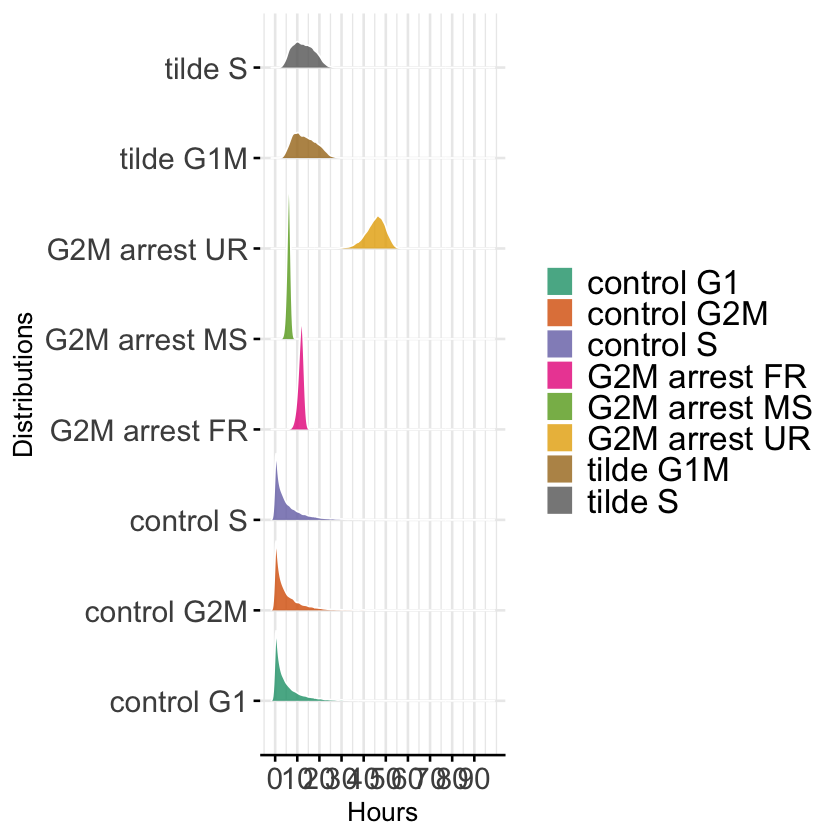

In [8]:
# Load necessary packages
library(ggridges)
library(ggplot2)
library(RColorBrewer)

# Generate random data for Weibull distributions (you can replace these with your actual data)
set.seed(123)
sample_size = 10000
# Load data from CSV files for discrete distributions (replace file paths)
discrete_data1 <- read.csv("model1_tileS.csv",  header = FALSE)
sample_data1 = discrete_data1[,1] 

discrete_data2 <- read.csv("model1_tileG1.csv", header = FALSE)
sample_data2 = discrete_data2[,1] 



data_weibull <- data.frame(
  Category = rep(
    c(
      "G2M arrest UR",
      "G2M arrest FR",
      "G2M arrest MS",
      "tilde G1M",
      "tilde S",
      "control G1",
      "control S",
      "control G2M"
    ),
    each = sample_size
  ),
  Value = c(
    rweibull(sample_size, shape = 11.762984, scale = 47.140529),
    rweibull(sample_size, shape = 11.762984, scale = 12.140526),
    rweibull(sample_size, shape = 11.762984, scale = 6.402180),
    sample_data1,
    sample_data2,
    rgamma(sample_size, shape = 0.5565 , scale = 10.1563816036989),
    rgamma(sample_size, shape = 0.5565 , scale = 11.0674534469914),
    rgamma(sample_size, shape = 0.5565 , scale = 10.1470681258926 )
  )
)

# Define a ColorBrewer palette with the number of colors you need
colors <- brewer.pal(8, "Dark2")  # You can change "Set1" to other palettes


# Create the ridgeline plot with larger dimensions
ggplot(data_weibull) +
  geom_density_ridges(aes(x = Value, y = Category, fill = Category), alpha = 0.8, color = "white") +
  scale_fill_manual(values = colors  ) +
  labs(
    x = "Hours",
    y = "Distributions",
   # title = "Distributions-Docetaxel",
    fill = "Distributions"
  ) +
  theme_minimal(base_size = 16) +  # Adjust font size
  theme(
    legend.position = "right",
    #plot.title = element_text(size = 20, hjust = 0.5),  # Adjust title font size and center it
    axis.text = element_text(size = 18),  # Adjust axis label font size
    legend.text = element_text(size = 20),  # Adjust legend label font size
    legend.title = element_blank(),  # Remove legend title
    #legend.title = element_text(size = 20),  # Adjust legend title font size
    axis.ticks = element_line(color = "black"),  # Show tick lines along the X-axis
    axis.line.x = element_line(color = "black"),  # Show X-axis line
    #panel.grid.major = element_blank(),  # Remove major gridlines
    #panel.grid.minor = element_blank()  # Remove minor gridlines
  ) +
  guides(fill = guide_legend(title = "Distributions")) +
  scale_x_continuous(breaks = seq( floor(min(data_weibull$Value)), ceiling(max(data_weibull$Value)), by = 10))  # Customize X-axis breaks

# Save the plot as a high-resolution image with larger dimensions
ggsave("dtx_ridgeline_plot.png", width = 11, height = 8, dpi = 300, bg = "white")


In [4]:
 ceiling(max(data_weibull$Value)) 

[1] 98

## Gem Distribution

Picking joint bandwidth of 0.541

Picking joint bandwidth of 0.541



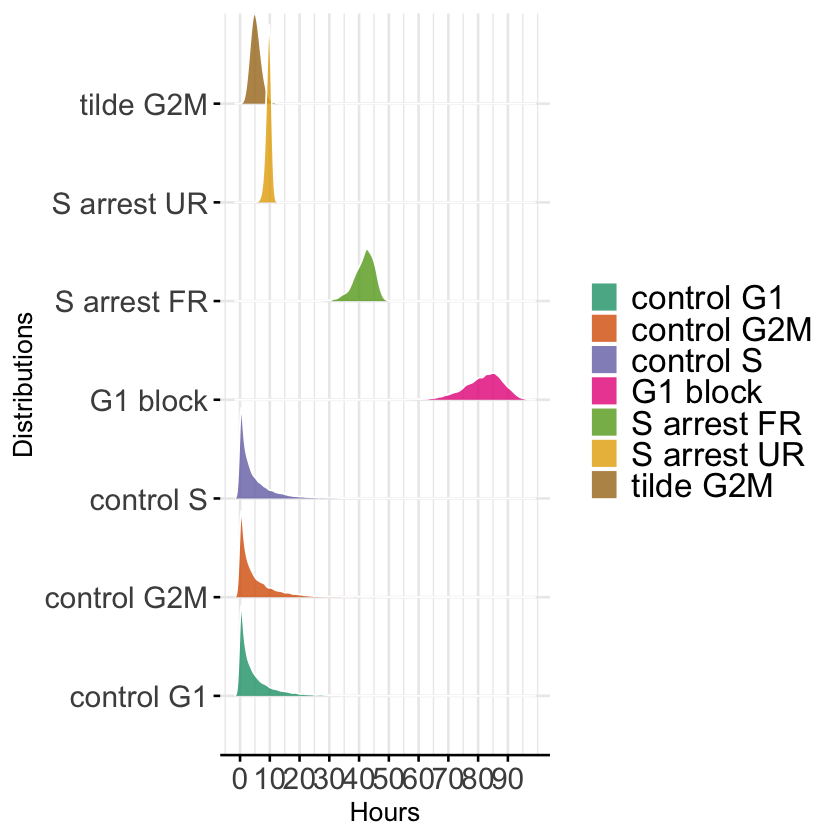

In [9]:
# Load necessary packages
library(ggridges)
library(ggplot2)
library(RColorBrewer)

# Generate random data for Weibull distributions (you can replace these with your actual data)
set.seed(123)
sample_size = 10000
# Load data from CSV files for discrete distributions (replace file paths)
discrete_data1 <- read.csv("model42_tileG2M.csv",  header = FALSE)
sample_data1 = discrete_data1[,1] 




data_weibull <- data.frame(
  Category = rep(
    c(
      "S arrest UR",
      "S arrest FR",
      "G1 block",
      "tilde G2M",
      "control G1",
      "control S",
      "control G2M"
    ),
    each = sample_size
  ),
  Value = c(
    rweibull(sample_size, shape = 14.840598, scale = 9.931896),
    rweibull(sample_size, shape = 14.840598, scale =  43.186743),
    rweibull(sample_size, shape = 14.840598, scale = 84.521381),
    sample_data1,
    rgamma(sample_size, shape =  0.5484, scale = 9.214542364169735),
    rgamma(sample_size, shape =  0.5484, scale = 8.94574200142664),
    rgamma(sample_size, shape =  0.5484, scale = 10.0165880566187)
  )
)

# Define a ColorBrewer palette with the number of colors you need
colors <- brewer.pal(8, "Dark2")  # You can change "Set1" to other palettes


# Create the ridgeline plot with larger dimensions
ggplot(data_weibull) +
  geom_density_ridges(aes(x = Value, y = Category, fill = Category), alpha = 0.8, color = "white") +
  scale_fill_manual(values = colors  ) +
  labs(
    x = "Hours",
    y = "Distributions",
    #title = "Distributions-Gemcitabine",
    fill = "Distributions"
  ) +
  theme_minimal(base_size = 16) +  # Adjust font size
  theme(
    legend.position = "right",
    #plot.title = element_text(size = 20, hjust = 0.5),  # Adjust title font size and center it
    axis.text = element_text(size = 18),  # Adjust axis label font size
    legend.text = element_text(size = 20),  # Adjust legend label font size
    legend.title = element_blank(),  # Remove legend title
    #legend.title = element_text(size = 20),  # Adjust legend title font size
    axis.ticks = element_line(color = "black"),  # Show tick lines along the X-axis
    axis.line.x = element_line(color = "black"),  # Show X-axis line
    #panel.grid.major = element_blank(),  # Remove major gridlines
    #panel.grid.minor = element_blank()  # Remove minor gridlines
  ) +
  guides(fill = guide_legend(title = "Distributions")) +
  scale_x_continuous(breaks = seq( floor(min(data_weibull$Value)), ceiling(max(data_weibull$Value)), by = 10))  # Customize X-axis breaks

# Save the plot as a high-resolution image with larger dimensions
ggsave("gem_ridgeline_plot.png", width = 10, height = 8, dpi = 300, bg = "white")


# Credible interval plot

In [28]:
library(readxl)
# Specify the Excel file path
excel_file <- "DTX_data.xls"
Model_Index = 1

# List all sheet names in the Excel file
sheet_names <- excel_sheets(excel_file)

# Read a specific sheet by name (e.g., "Sheet1")
data_sheet1 <- read_excel(excel_file, sheet = "Sheet1" )

# Read another sheet (e.g., "Sheet2")
data_sheet2 <- read_excel(excel_file, sheet = "Sheet2")


# Read another sheet (e.g., "Sheet2")
data_sheet3 <- read_excel(excel_file, sheet = "Sheet3")
 

In [29]:
# Get the column names
column_names <- names(data_sheet1 )

# Print the column names
print(column_names)

[1] "Time"             "Variable"         "ExperimentalTime" "ExperimentalData"
[5] "CI_Lower"         "CI_Upper"        


Warning message:
“Removed 276 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 276 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 276 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 276 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 276 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 276 rows containing missing values (`geom_point()`).”


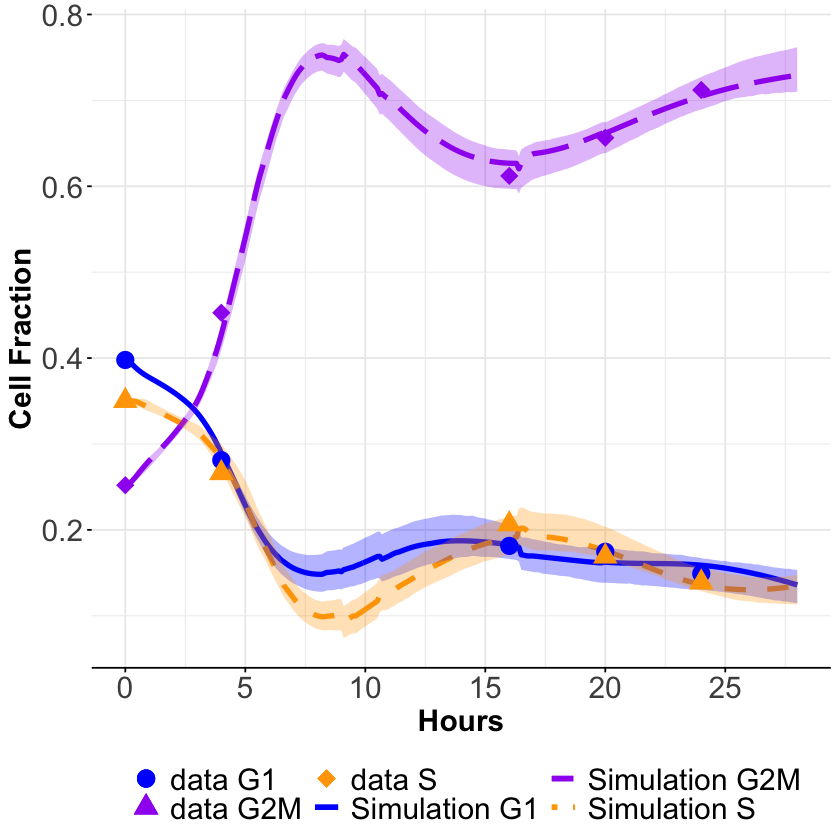

In [30]:
# Load the required library
library(ggplot2)

# Example data (replace with your own data)
set.seed(123)

# Create a data frame for plotting (assuming you have data_sheet1, data_sheet2, and data_sheet3)
simdata <- data.frame(
  Time = data_sheet1$Time,
  SimulationG1 = data_sheet1$Variable,
  SimulationS = data_sheet2$Variable,
  SimulationG2M = data_sheet3$Variable,
  CI_SimulationG1_Lower = data_sheet1$CI_Lower,
  CI_SimulationG1_Upper = data_sheet1$CI_Upper,
  CI_SimulationS_Lower = data_sheet2$CI_Lower,
  CI_SimulationS_Upper = data_sheet2$CI_Upper,
  CI_SimulationG2M_Lower = data_sheet3$CI_Lower,
  CI_SimulationG2M_Upper = data_sheet3$CI_Upper,
  ExperimentalTime = data_sheet1$ExperimentalTime,
  Experimentaldata1 = data_sheet1$ExperimentalData,
  Experimentaldata2 = data_sheet2$ExperimentalData,
  Experimentaldata3 = data_sheet3$ExperimentalData
)

# Create the plot with publication quality
ggplot(simdata, aes(x = Time)) +
  geom_line(aes(y = SimulationG1, color = "Simulation G1", linetype = "Simulation G1"), size = 1.5) +
  geom_line(aes(y = SimulationS, color = "Simulation S", linetype = "Simulation S"), size = 1.5) +
  geom_line(aes(y = SimulationG2M, color = "Simulation G2M", linetype = "Simulation G2M"), size = 1.5) +
  
  geom_ribbon(
    aes(ymin = CI_SimulationG1_Lower, ymax = CI_SimulationG1_Upper, fill = "Simulation G1"),
    alpha = 0.3, show.legend = FALSE
  ) +
  geom_ribbon(
    aes(ymin = CI_SimulationS_Lower, ymax = CI_SimulationS_Upper, fill = "Simulation S"),
    alpha = 0.3, show.legend = FALSE
  ) +
  geom_ribbon(
    aes(ymin = CI_SimulationG2M_Lower, ymax = CI_SimulationG2M_Upper, fill = "Simulation G2M"),
    alpha = 0.3, show.legend = FALSE
  ) +
  
  geom_point(aes(x = ExperimentalTime, y = Experimentaldata1, color = "data G1", shape = "data G1"), size = 4.8) +
  geom_point(aes(x = ExperimentalTime, y = Experimentaldata2, color = "data S", shape = "data S"), size = 4.8) +
  geom_point(aes(x = ExperimentalTime, y = Experimentaldata3, color = "data G2M", shape = "data G2M"), size = 4.8) +
  
  # Define colors
  scale_color_manual(
    values = c(
      "Simulation G1" = "blue",
      "Simulation S" = "orange",
      "Simulation G2M" = "purple",
      "data G1" = "blue",
      "data S" = "orange",
      "data G2M" = "purple"
    )
  ) +
    # Define line styles
  scale_linetype_manual(
    values = c(
      "Simulation G1" = "solid",
      "Simulation S" = "dashed",
      "Simulation G2M" = "longdash"

    )
  ) +
  # Define shapes
  scale_shape_manual(
    values = c(
      "data G1" = 16,   # Circle
      "data S" = 17,    # Triangle
      "data G2M" = 18   # Diamond
    )
  ) +
  scale_fill_manual(
    values = c("Simulation G1" = "blue", "Simulation S" = "orange", "Simulation G2M" =  "purple"),
    labels = c("Simulation G1", "Simulation S", "Simulation G2M")
  ) +
  # Combine legends into a single legend
 guides(
    color = guide_legend(title = "Legend", override.aes = list(shape = c(16, 17,18, NA, NA,NA) , linetype = c(0, 0, 0, 1 ,2,3)      )  ), # 1=solid, 2=dashed, 3=dotted,0= there's no shape displayed for the Simulation data in the legend.
    shape = FALSE,
    linetype = FALSE
  ) + 

  # Theme and labels
  theme_minimal() +
  labs(
    x = "Hours",
    y = "Cell Fraction",
   # title = "Model Simulation vs. Experimental Data"
  ) +
  theme(
    legend.title = element_blank(),  # Remove legend title
    legend.position = "bottom",         # Place legend at the top
    legend.box = "horizontal",       # Horizontal legend box
    legend.text = element_text(size = 18),  # Legend text size
    text = element_text(size = 12),   # Adjust text size
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),  # Title font size and style
    axis.ticks = element_line(color = "black"),  # Show tick lines along the X-axis
    axis.line.x = element_line(color = "black"),  # Show X-axis line
    axis.title = element_text(size = 18, face = "bold"),  # Axis label font size and style
    axis.text = element_text(size = 18)  # Axis text size
  ) + 
 scale_x_continuous(breaks = seq( min( data_sheet1$Time), max( data_sheet1$Time), by = 5)) # Here, breaks are set every 2 units.

# Save the plot as a high-resolution image with larger dimensions
ggsave( sprintf("Model%d_SimWithCredibleInterval.png", Model_Index ), width = 10, height = 8, dpi = 2000, bg = "white")


In [ ]:
min(data_sheet1$Time), max(data_sheet1$Time)

In [206]:
max( data_sheet1$Time )

[1] 28

In [48]:
install.packages("level.colors")

Warning message:
“package ‘level.colors’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [51]:
# Load necessary libraries
library(ggplot2)

# Read data from the CSV file
data <- read.csv("Model1_MCMCcorrelation.csv")

# Assuming the first 22 columns are parameter values
params <- data[, 1:22]

# Assuming the last column contains posterior probabilities
posterior_probs <- data[, 23]

# Create a color palette for posterior probabilities
colors <- colorRampPalette(c("black", "white"))(100)

# Create a PNG image file for the plot
png("parameter_correlation_plot.png", width = 10*300, height = 10*300, res = 300)

pairs(params, 
      col = colors[cut(posterior_probs, breaks = 100)], # Assign colors based on probabilities
      pch = 19, # Use filled circles as points
      main = "MCMC Parameter Correlation Plot",
      lower.panel = NULL) # Remove lower panel

# Add a color legend for posterior probabilities
legend("topright", legend = c("Low Prob", "High Prob"), 
       fill = colorRampPalette(c("blue", "red"))(2),
       title = "Posterior Probability")

# Close the PNG device to save the file
dev.off()


pdf 
  2

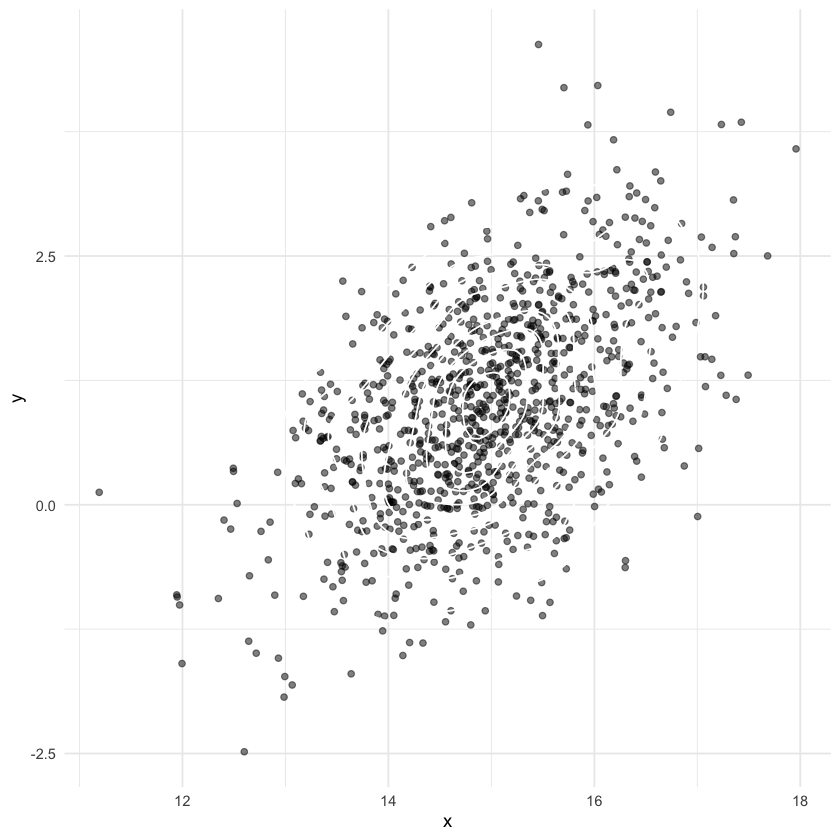

In [57]:
library(ggplot2)
set.seed(1234) # For reproducibility
n <- 1000
data <- MASS::mvrnorm(n, mu = c(15, 1), Sigma = matrix(c(1, 0.5, 0.5, 1), 2))
df <- as.data.frame(data)
colnames(df) <- c("x", "y")
p <- ggplot(df, aes(x=x, y=y)) + 
    geom_point(aes(x=x, y=y), alpha=0.5) + 
    geom_density_2d(aes(x=x, y=y), colour="white") + 
    theme_minimal()
print(p)
